In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [104]:
dataset=pd.read_csv(r"C:\Users\sai kiran\Documents\dataaa.csv")
dataset.head()

,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,6.3,NW,30,SW,NW,6.0,20,68,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,9.7,ENE,39,E,W,4.0,17,80,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,3.3,NW,85,N,NNE,6.0,6,82,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,9.1,NW,54,WNW,W,30.0,24,62,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,10.6,SSE,50,SSE,ESE,20.0,28,68,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


In [105]:
dataset.isnull().any()

Sunshine         False
WindGustDir      False
WindGustSpeed    False
WindDir9am       False
WindDir3pm       False
WindSpeed9am      True
WindSpeed3pm     False
Humidity9am      False
Humidity3pm      False
Pressure9am      False
Pressure3pm      False
Cloud9am         False
Cloud3pm         False
Temp9am          False
Temp3pm          False
RainToday        False
RISK_MM          False
RainTomorrow     False
dtype: bool

In [106]:
dataset['WindSpeed9am'].fillna(dataset['WindSpeed9am'].mean(), inplace=True)

In [107]:
dataset.isnull().any()

Sunshine         False
WindGustDir      False
WindGustSpeed    False
WindDir9am       False
WindDir3pm       False
WindSpeed9am     False
WindSpeed3pm     False
Humidity9am      False
Humidity3pm      False
Pressure9am      False
Pressure3pm      False
Cloud9am         False
Cloud3pm         False
Temp9am          False
Temp3pm          False
RainToday        False
RISK_MM          False
RainTomorrow     False
dtype: bool

In [108]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dataset['WindGustDir'] =le.fit_transform(dataset['WindGustDir'])
dataset['WindDir9am'] =le.fit_transform(dataset['WindDir9am'])
dataset['WindDir3pm'] =le.fit_transform(dataset['WindDir3pm'])
dataset['RainToday'] =le.fit_transform(dataset['RainToday'])
dataset['RainTomorrow'] =le.fit_transform(dataset['RainTomorrow'])



In [109]:
dataset.head()

,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,6.3,7,30,12,7,6.0,20,68,29,1019.7,1015.0,7,7,14.4,23.6,0,3.6,1
1,9.7,1,39,0,13,4.0,17,80,36,1012.4,1008.4,5,3,17.5,25.7,1,3.6,1
2,3.3,7,85,3,5,6.0,6,82,69,1009.5,1007.2,8,7,15.4,20.2,1,39.8,1
3,9.1,7,54,14,13,30.0,24,62,56,1005.5,1007.0,2,7,13.5,14.1,1,2.8,1
4,10.6,10,50,10,2,20.0,28,68,49,1018.3,1018.5,7,7,11.1,15.4,1,0.0,0


In [110]:
x=dataset.iloc[:,:17].values

In [111]:
x

array([[ 6.3,  7. , 30. , ..., 23.6,  0. ,  3.6],
       [ 9.7,  1. , 39. , ..., 25.7,  1. ,  3.6],
       [ 3.3,  7. , 85. , ..., 20.2,  1. , 39.8],
       ...,
       [ 8.3,  2. , 48. , ..., 19.1,  0. ,  0. ],
       [ 4.9,  9. , 35. , ..., 15.2,  0. ,  0. ],
       [ 7.1,  2. , 33. , ..., 15.6,  0. ,  0. ]])

In [112]:
y=dataset.iloc[:,-1].values

In [113]:
y

array([1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [114]:
x[:,1].max()



15.0

In [115]:
from sklearn.preprocessing import OneHotEncoder
one1 =OneHotEncoder(categorical_features= [1])
x=one1.fit_transform(x).toarray()
x=x[:,1:]
x

E:\new\anaconda\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
E:\new\anaconda\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


array([[ 0. ,  0. ,  0. , ..., 23.6,  0. ,  3.6],
       [ 1. ,  0. ,  0. , ..., 25.7,  1. ,  3.6],
       [ 0. ,  0. ,  0. , ..., 20.2,  1. , 39.8],
       ...,
       [ 0. ,  1. ,  0. , ..., 19.1,  0. ,  0. ],
       [ 0. ,  0. ,  0. , ..., 15.2,  0. ,  0. ],
       [ 0. ,  1. ,  0. , ..., 15.6,  0. ,  0. ]])

In [116]:
x[:,17].max()



15.0

In [117]:
from sklearn.preprocessing import OneHotEncoder
one1 =OneHotEncoder(categorical_features= [17])
x=one1.fit_transform(x).toarray()
x=x[:,1:]
x

E:\new\anaconda\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
E:\new\anaconda\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


array([[ 0. ,  0. ,  0. , ..., 23.6,  0. ,  3.6],
       [ 0. ,  0. ,  0. , ..., 25.7,  1. ,  3.6],
       [ 0. ,  0. ,  1. , ..., 20.2,  1. , 39.8],
       ...,
       [ 0. ,  0. ,  0. , ..., 19.1,  0. ,  0. ],
       [ 0. ,  0. ,  0. , ..., 15.2,  0. ,  0. ],
       [ 0. ,  0. ,  0. , ..., 15.6,  0. ,  0. ]])

In [118]:
x[:,32].max()

15.0

In [121]:
from sklearn.preprocessing import OneHotEncoder
one1 =OneHotEncoder(categorical_features= [32])
x=one1.fit_transform(x).toarray()
x=x[:,1:]
x

E:\new\anaconda\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
E:\new\anaconda\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


array([[ 0. ,  0. ,  0. , ..., 23.6,  0. ,  3.6],
       [ 0. ,  0. ,  0. , ..., 25.7,  1. ,  3.6],
       [ 0. ,  0. ,  0. , ..., 20.2,  1. , 39.8],
       ...,
       [ 1. ,  1. ,  0. , ..., 19.1,  0. ,  0. ],
       [ 0. ,  0. ,  1. , ..., 15.2,  0. ,  0. ],
       [ 1. ,  0. ,  1. , ..., 15.6,  0. ,  0. ]])

In [122]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)



In [162]:
# Fitting KNN to the Training set
''''from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2) #metric is accuracy n p is 2cm
classifier.fit(x_train, y_train)'''


"'from sklearn.neighbors import KNeighborsClassifier\nclassifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2) #metric is accuracy n p is 2cm\nclassifier.fit(x_train, y_train)"

In [163]:
# Fitting Naive Bayes to the Training set
''''from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)'''


"'from sklearn.naive_bayes import GaussianNB\nclassifier = GaussianNB()\nclassifier.fit(x_train, y_train)"

In [161]:
# Fitting Decision Tree Classification to the Training set
''''from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)'''


"'from sklearn.tree import DecisionTreeClassifier\nclassifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)\nclassifier.fit(x_train, y_train)"

In [160]:
# Fitting Random Forest Classification to the Training set
''''from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)'''


"'from sklearn.ensemble import RandomForestClassifier\nclassifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)\nclassifier.fit(x_train, y_train)"

In [147]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train, y_train)


E:\new\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [148]:
# Predicting the Test set results
y_pred4 = classifier.predict(x_test)
y_pred4

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0])

In [149]:
y_test

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0])

In [150]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred4)
score

0.9767441860465116

In [158]:
import seaborn as sns
%matplotlib inline


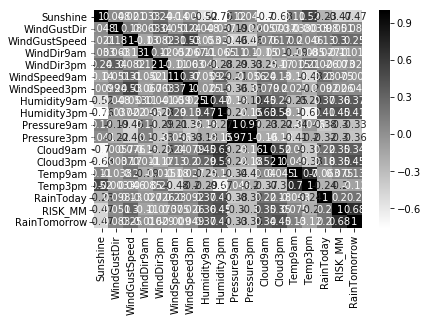

In [159]:
sns.heatmap(dataset.corr(),cmap='binary',annot=True)

In [155]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred4)
cm

array([[36,  0],
       [ 1,  6]], dtype=int64)

In [156]:
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred4)
roc_auc = metrics.auc(fpr, tpr)


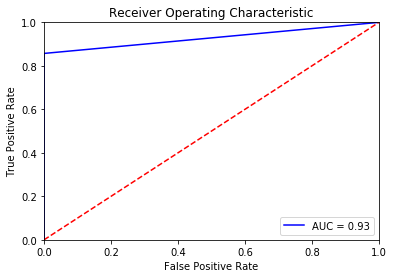

In [157]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
